In [1]:
import pandas
import cobra
import os
from tqdm import tqdm
import numpy
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

directory = "./thauera-files/ThaueraPaper/"

sampling_dir = "OptimalHeterotrophic/"
# sampling_dir = "OptimalAnaerobicDesnitrification/"

ranks_dir = "ranks-simplified/"

In [2]:
MW = pandas.read_csv(sampling_dir+"MWU-greater-results.csv",index_col=0).drop("Extracellular exchange")

/tmp/ipykernel_3405100/2467111405.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds').copy()


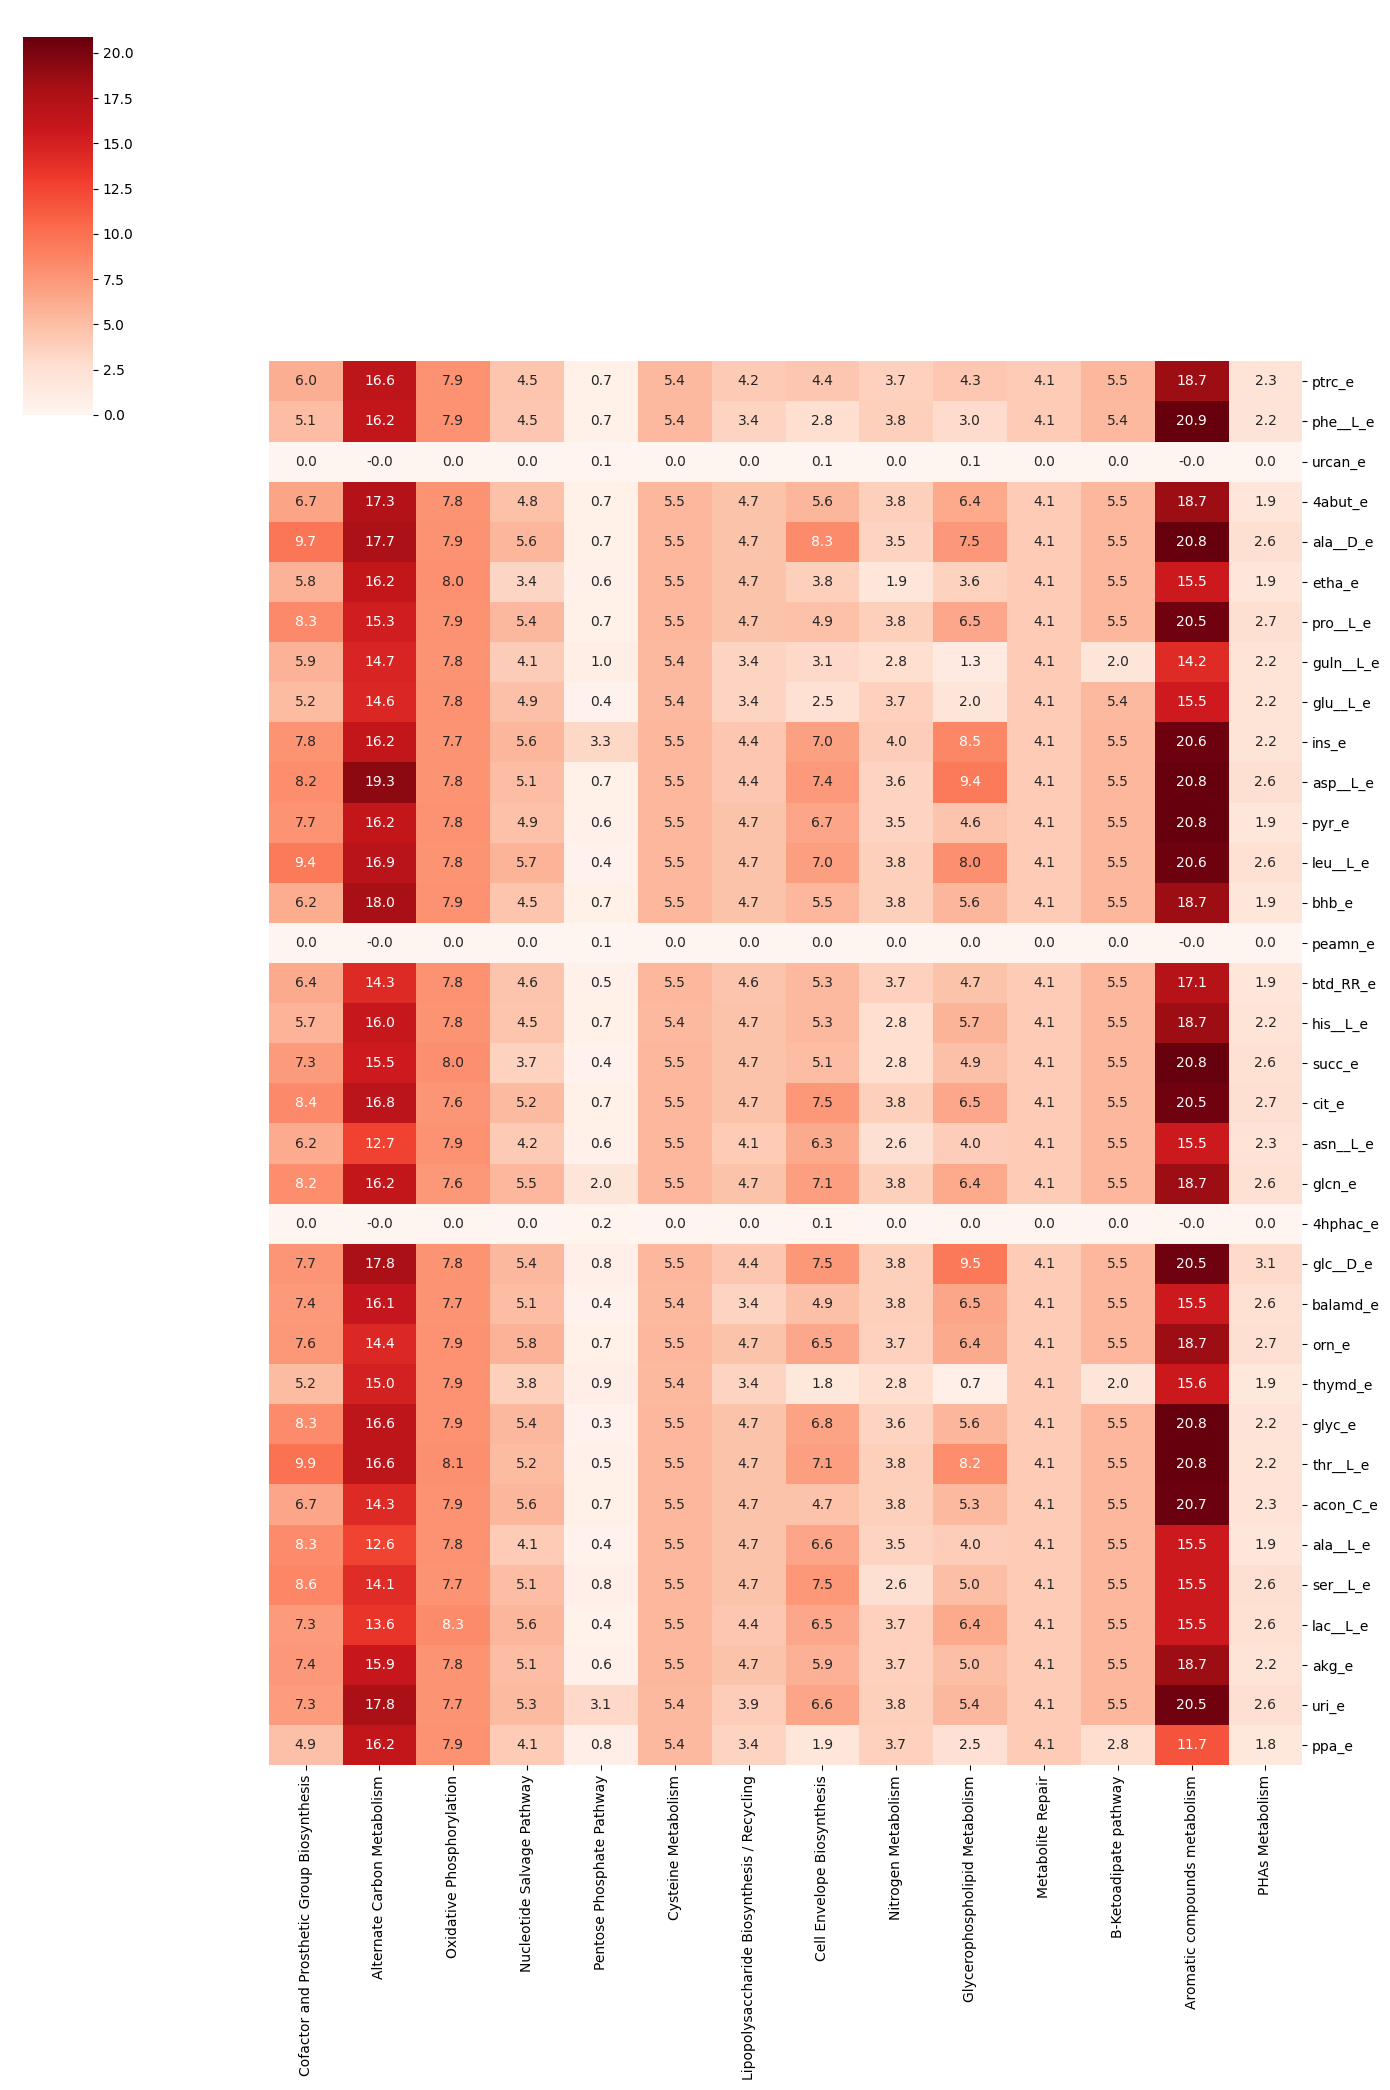

In [3]:
import seaborn as sns
cmap_df = -numpy.log10(MW)
cmap_df = cmap_df[(cmap_df>=3).any(axis=1)].T # Only significant
cmap = plt.cm.get_cmap('Reds').copy()
cmap.set_under('white')
vmin,vmax = (1.0,2)
cmap = sns.clustermap(cmap_df,
               row_cluster=False,
               col_cluster=False,
               # vmin=vmin,
               # vmax=vmax,
               annot=True,
               fmt=".1f",
               cmap=cmap,
               # annot_kws={'rotation': 90}
               figsize=(1.0*cmap_df.shape[1],(0.6)*cmap_df.shape[0]),
               # cbar=False,
              )
labels = [i.get_text() for i in cmap.ax_heatmap.yaxis.get_majorticklabels()]
plt.savefig("./figures/hetero-MWU-greater-results.svg",format="SVG")

In [4]:
MW = pandas.read_csv(sampling_dir+"MWU-less-results.csv",index_col=0).drop("Extracellular exchange")

/tmp/ipykernel_3405100/1738209417.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues').copy()


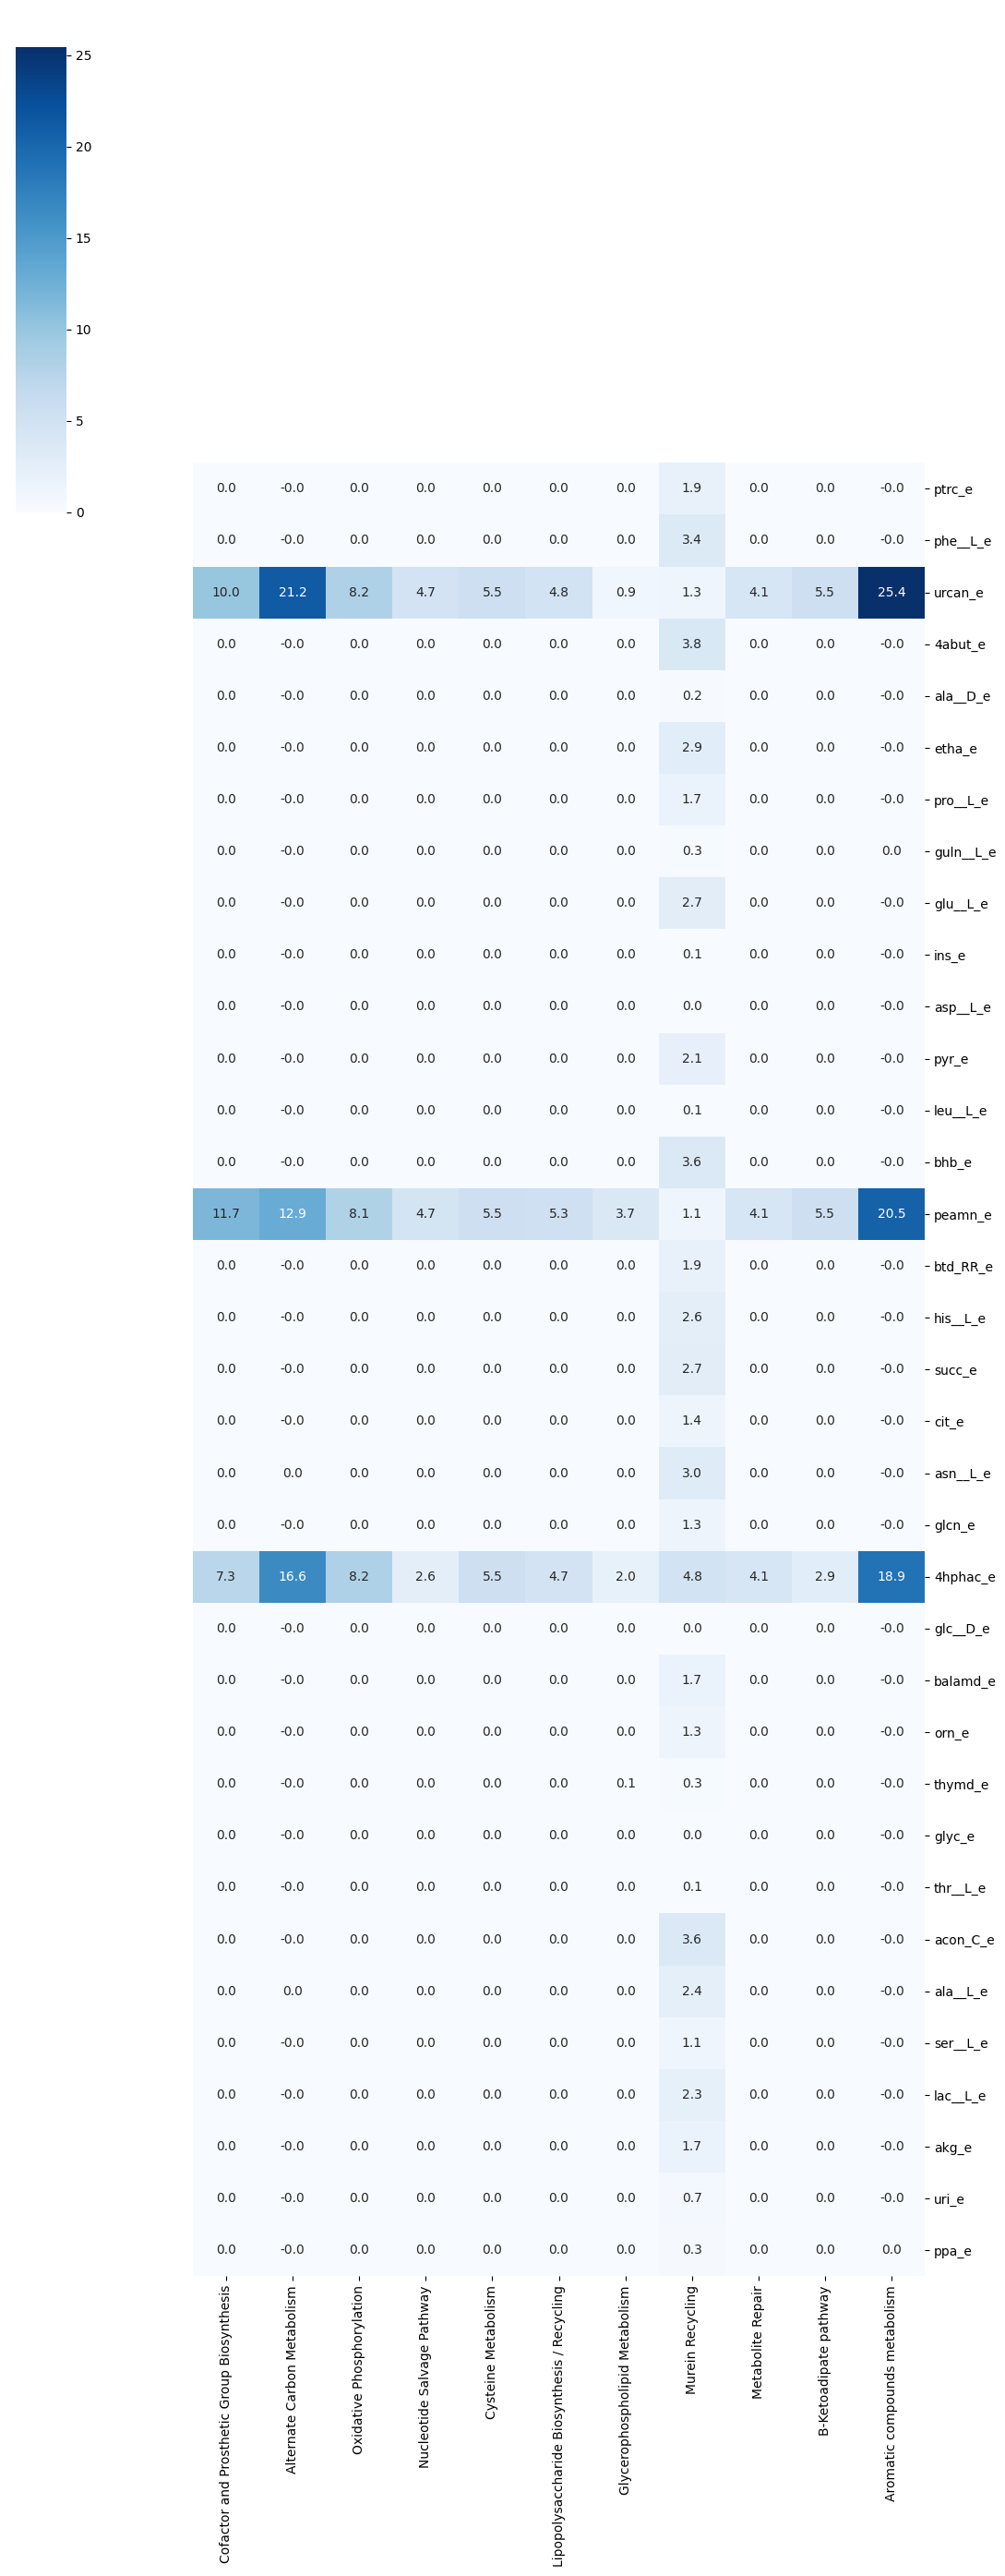

In [5]:
import seaborn as sns
cmap_df = -numpy.log10(MW)
cmap_df = cmap_df[(cmap_df>=3).any(axis=1)].T # Only significant

assert cmap_df.shape[0] > 1

cmap = plt.cm.get_cmap('Blues').copy()
cmap.set_under('white')
vmin,vmax = (1.0,2)
cmap = sns.clustermap(cmap_df,
               row_cluster=False,
               col_cluster=False,
               # vmin=vmin,
               # vmax=vmax,
               annot=True,
               fmt=".1f",
               cmap=cmap,
               # annot_kws={'rotation': 90}
               figsize=(1.0*cmap_df.shape[1],(0.8)*cmap_df.shape[0]),
               # cbar=False,
              )
labels = [i.get_text() for i in cmap.ax_heatmap.yaxis.get_majorticklabels()]
plt.savefig("./figures/hetero-MWU-less-results.svg",format="SVG")
